<a href="https://colab.research.google.com/github/h-asawa/Bool-SAT-Prob-Using-Grover-Algo/blob/main/GroverProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 7.2 MB/s 
     |████████████████████████████████| 18.0 MB 348 kB/s 
     |████████████████████████████████| 240 kB 55.6 MB/s 
     |████████████████████████████████| 198 kB 57.9 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 112 kB 56.1 MB/s 
     |████████████████████████████████| 1.6 MB 73.6 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 943 kB 48.1 MB/s 
     |████████████████████████████████| 37.5 MB 51 kB/s 
     |████████████████████████████████| 38.1 MB 112 kB/s 
     |████████████████████████████████| 4.0 MB 53.1 MB/s 
     |████████████████████████████████| 112 kB 67.9 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.2-py3-none-any.whl size=11933 sha256=bff28ee81b2

In [ ]:

# importing Qiskit
from qiskit import Aer, transpile, assemble, BasicAer
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import Diagonal
# import basic plot tools
from qiskit.visualization import plot_histogram

#import Statevector
from qiskit.quantum_info import Statevector

#importing execute
from qiskit.execute_function import execute

In [ ]:
qc = QuantumCircuit(5)

i = 1
j = 1

#marking the states 11000,11001,11010,11011,11110.
sol1 = Statevector.from_label(str(i) + str(j) + '000')
sol1_circ = Diagonal((-1)**sol1.data)
qc += sol1_circ

sol2 = Statevector.from_label(str(i) + str(j) + '001')
sol2_circ = Diagonal((-1)**sol2.data)
qc += sol2_circ

sol3 = Statevector.from_label(str(i) + str(j) + '010')
sol3_circ = Diagonal((-1)**sol3.data)
qc += sol3_circ

sol4 = Statevector.from_label(str(i) + str(j) + '011')
sol4_circ = Diagonal((-1)**sol4.data)
qc += sol4_circ

sol5 = Statevector.from_label(str(i) + str(j) + '110')
sol5_circ = Diagonal((-1)**sol5.data)
qc += sol5_circ 

#return oracle as a gate
oracle_ex3 = qc.to_gate()
qc.draw()

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: The QuantumCircuit._

┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐
q_0: ┤0          ├┤0          ├┤0          ├┤0          ├┤0          ├
     │           ││           ││           ││           ││           │
q_1: ┤1          ├┤1          ├┤1          ├┤1          ├┤1          ├
     │           ││           ││           ││           ││           │
q_2: ┤2 Diagonal ├┤2 Diagonal ├┤2 Diagonal ├┤2 Diagonal ├┤2 Diagonal ├
     │           ││           ││           ││           ││           │
q_3: ┤3          ├┤3          ├┤3          ├┤3          ├┤3          ├
     │           ││           ││           ││           ││           │
q_4: ┤4          ├┤4          ├┤4          ├┤4          ├┤4          ├
     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘

In [ ]:
#creating a general diffuser for 5 qubits to be appended

def diffuser():
    qc = QuantumCircuit(5)
    # H-gates
    for qubit in range(5):
        qc.h(qubit)
    # X-gates
    for qubit in range(5):
        qc.x(qubit)
    # Multi-controlled-Z gate
    qc.h(4)
    qc.mct(list(range(4)), 4)  # multi-controlled-toffoli
    qc.h(4)
    # X gates
    for qubit in range(5):
        qc.x(qubit)
    # H gates
    for qubit in range(5):
        qc.h(qubit)
    # return diffuser as a gate
    U_s = qc.to_gate()
    return U_s

In [ ]:
def initialize_s(qc, qubits):
    #apply H gate to all qubits in qc.
    for q in qubits:
        qc.h(q)
    return qc
n = 5
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2,3,4])
grover_circuit.append(qc, [0,1,2,3,4])
grover_circuit.append(diffuser(), [0,1,2,3,4])
grover_circuit.append(qc, [0,1,2,3,4])
grover_circuit.append(diffuser(), [0,1,2,3,4])

#using state vector simulator to calculate amplitude of states prior to measurement
backend = BasicAer.get_backend('statevector_simulator')
job = execute(grover_circuit,backend)
result = job.result()
state_vector = result.get_statevector()
print(state_vector)

grover_circuit.measure_all()
grover_circuit.draw()

[-0.08562621-2.42501059e-16j -0.08562621-9.35547008e-18j
 -0.08562621-2.48344211e-16j -0.08562621-6.20451998e-17j
 -0.08562621+1.71931426e-17j -0.08562621-2.95749726e-16j
 -0.08562621-3.15911873e-16j -0.08562621-2.28124576e-16j
 -0.08562621-3.46119587e-16j -0.08562621-3.19872759e-16j
 -0.08562621-4.70598763e-16j -0.08562621-6.73335434e-16j
 -0.08562621-1.48553544e-16j -0.08562621-3.86436636e-16j
 -0.08562621-3.95859073e-16j -0.08562621-3.83388103e-16j
 -0.08562621+4.12731355e-17j -0.08562621-3.22778933e-17j
 -0.08562621-1.81867211e-16j -0.08562621-1.14896595e-16j
 -0.08562621-4.14792712e-17j -0.08562621-1.58747825e-16j
 -0.08562621+3.66164742e-18j -0.08562621-2.29842422e-16j
  0.4005097 +4.00172955e-16j  0.4005097 +5.09234559e-16j
  0.4005097 +1.00690526e-15j  0.4005097 +7.03102673e-16j
 -0.08562621-4.03088521e-16j -0.08562621-1.20102619e-16j
  0.4005097 +1.13686294e-15j -0.08562621-3.86829120e-16j]


┌───┐┌────────────┐┌───────────────┐┌────────────┐┌───────────────┐ ░ »
   q_0: ┤ H ├┤0           ├┤0              ├┤0           ├┤0              ├─░─»
        ├───┤│            ││               ││            ││               │ ░ »
   q_1: ┤ H ├┤1           ├┤1              ├┤1           ├┤1              ├─░─»
        ├───┤│            ││               ││            ││               │ ░ »
   q_2: ┤ H ├┤2 circuit-0 ├┤2 circuit-2418 ├┤2 circuit-0 ├┤2 circuit-2423 ├─░─»
        ├───┤│            ││               ││            ││               │ ░ »
   q_3: ┤ H ├┤3           ├┤3              ├┤3           ├┤3              ├─░─»
        ├───┤│            ││               ││            ││               │ ░ »
   q_4: ┤ H ├┤4           ├┤4              ├┤4           ├┤4              ├─░─»
        └───┘└────────────┘└───────────────┘└────────────┘└───────────────┘ ░ »
meas: 5/══════════════════════════════════════════════════════════════════════»
                                                                              »
«        ┌─┐            
«   q_0: ┤M├────────────
«        └╥┘┌─┐         
«   q_1: ─╫─┤M├─────────
«         ║ └╥┘┌─┐      
«   q_2: ─╫──╫─┤M├──────
«         ║  ║ └╥┘┌─┐   
«   q_3: ─╫──╫──╫─┤M├───
«         ║  ║  ║ └╥┘┌─┐
«   q_4: ─╫──╫──╫──╫─┤M├
«         ║  ║  ║  ║ └╥┘
«meas: 5/═╩══╩══╩══╩══╩═
«         0  1  2  3  4

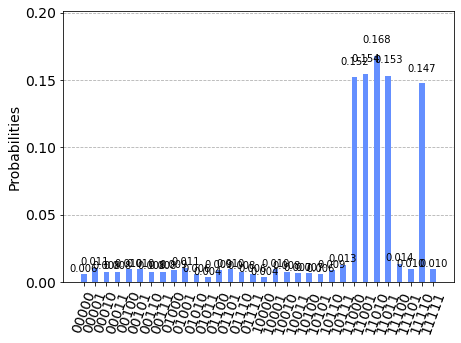

In [ ]:
#getting the results
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj,iterations = 2).result()
counts = results.get_counts()
plot_histogram(counts)

The correct possible combinations in dinner party are (11110) , (11000) , (11001) , (11010) , (11011). Each bit corresponds respectively to Alice,Bob,Charles,Dave and Eve.